# Ordinary least squares, ridge regression, and KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Overfitting and underfitting

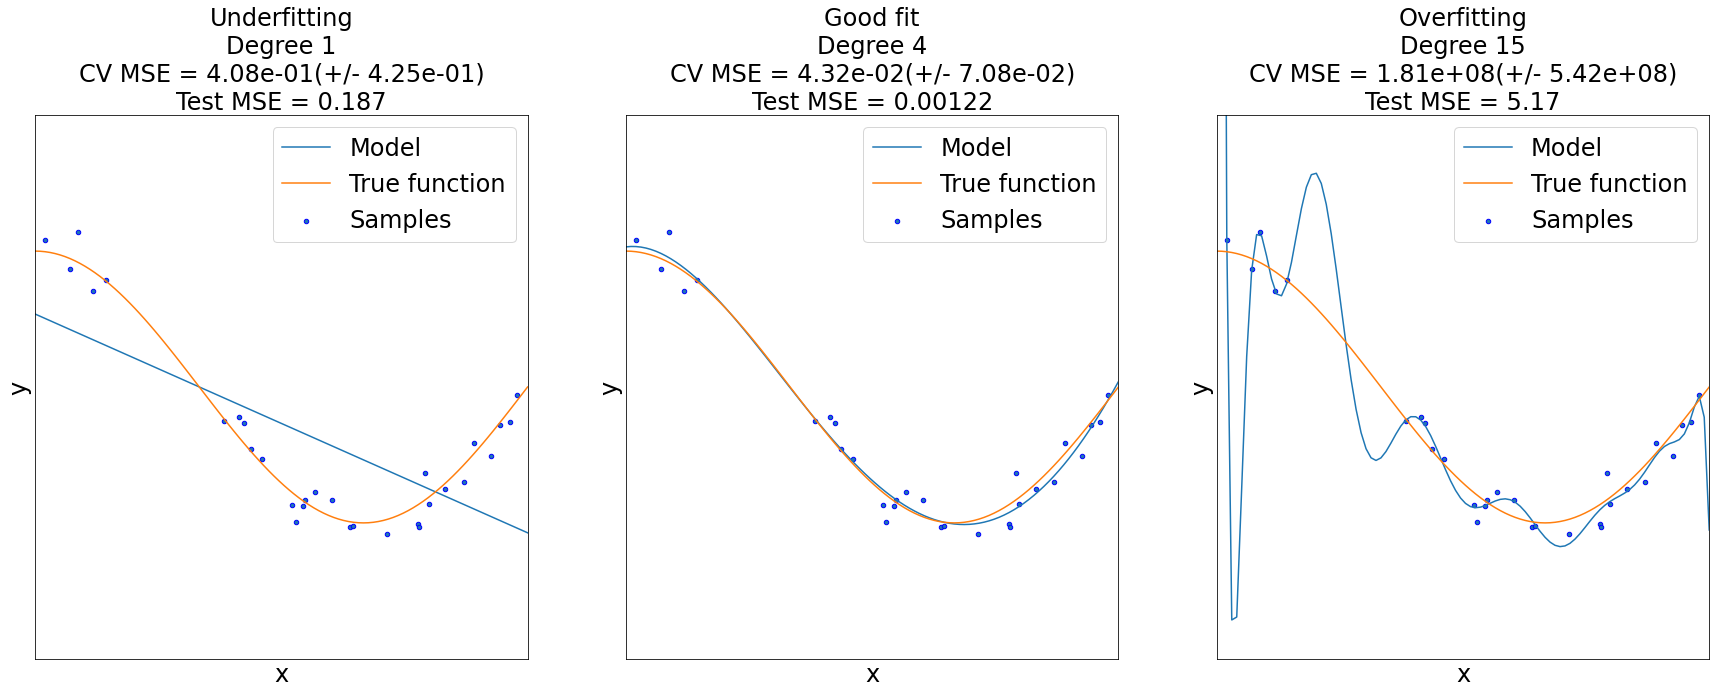

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def mse_loss(coef, intercept, X_feat, y):
    intercept_vector = np.ones(y.shape[0]) * intercept
    return np.mean(( X_feat @ coef - y + intercept_vector)**2)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]
labels = ['Underfitting', 'Good fit', 'Overfitting']

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(30, 10))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    #Create new data and featurize for generalization error estimation
    X_lin = np.linspace(0, 1, 100)
    X_test = np.sort(np.random.rand(10000))
    polynomial_features_temp = PolynomialFeatures(degree=degrees[i],include_bias=False)
    X_feat = polynomial_features_temp.fit_transform(X_test[:,np.newaxis])
    
    #Plot
    plt.plot(X_lin, pipeline.predict(X_lin[:, np.newaxis]), label="Model")
    plt.plot(X_lin, true_fun(X_lin), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x", fontsize=24)
    plt.ylabel("y", fontsize=24)
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best", fontsize=24)
    plt.title(labels[i] + "\nDegree {}\nCV MSE = {:.2e}(+/- {:.2e})\nTest MSE = {:.3}".format(
        degrees[i], -scores.mean(), scores.std(), mse_loss(linear_regression.coef_,
                                                           linear_regression.intercept_,
                                                           X_feat,
                                                           true_fun(X_test))), fontsize=24)
plt.show()


# Ridge regression and overfitting

Instead of minimizing
$$
\| y - X \beta \|_2^2
$$
we will minimize
$$
\| y - X \beta \|_2^2 + \lambda \|\beta\|_2^2.
$$

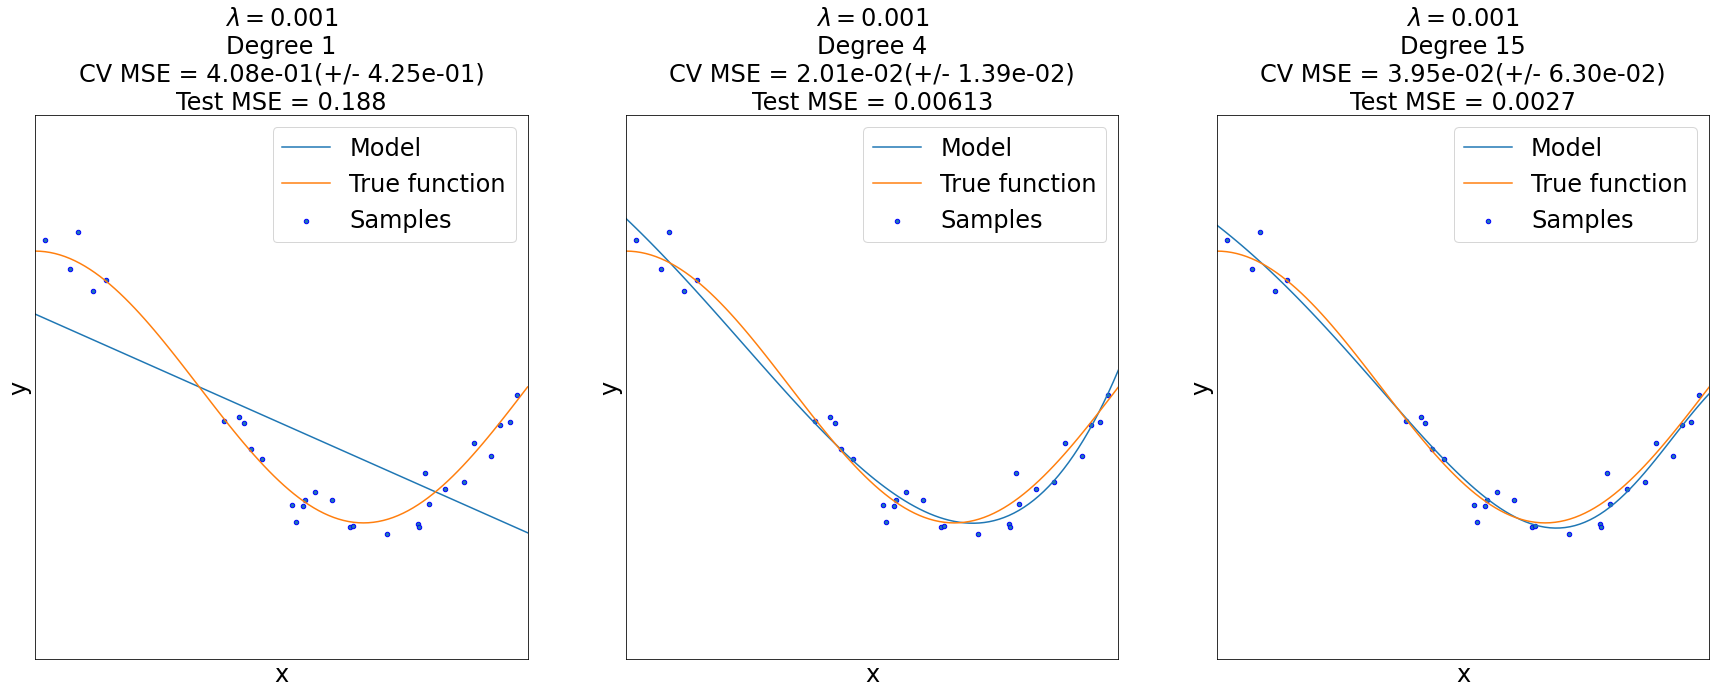

In [3]:
from sklearn.linear_model import Ridge
alpha = 0.001

plt.figure(figsize=(30, 10))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    ridge_regression = Ridge(alpha=alpha)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", ridge_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    #Create new data and featurize for generalization error estimation
    X_lin = np.linspace(0, 1, 100)
    X_test = np.sort(np.random.rand(10000))
    polynomial_features_temp = PolynomialFeatures(degree=degrees[i],include_bias=False)
    X_feat = polynomial_features_temp.fit_transform(X_test[:,np.newaxis])
    
    #Plot
    plt.plot(X_lin, pipeline.predict(X_lin[:, np.newaxis]), label="Model")
    plt.plot(X_lin, true_fun(X_lin), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x", fontsize=24)
    plt.ylabel("y", fontsize=24)
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best", fontsize=24)
    plt.title( r"$\lambda=$" + str(alpha) + "\nDegree {}\nCV MSE = {:.2e}(+/- {:.2e})\nTest MSE = {:.3}".format(
        degrees[i], -scores.mean(), scores.std(), mse_loss(ridge_regression.coef_,
                                                           ridge_regression.intercept_,
                                                           X_feat,
                                                           true_fun(X_test))), fontsize=24)
plt.show()


# Ridge does really shrink the weights of OLS

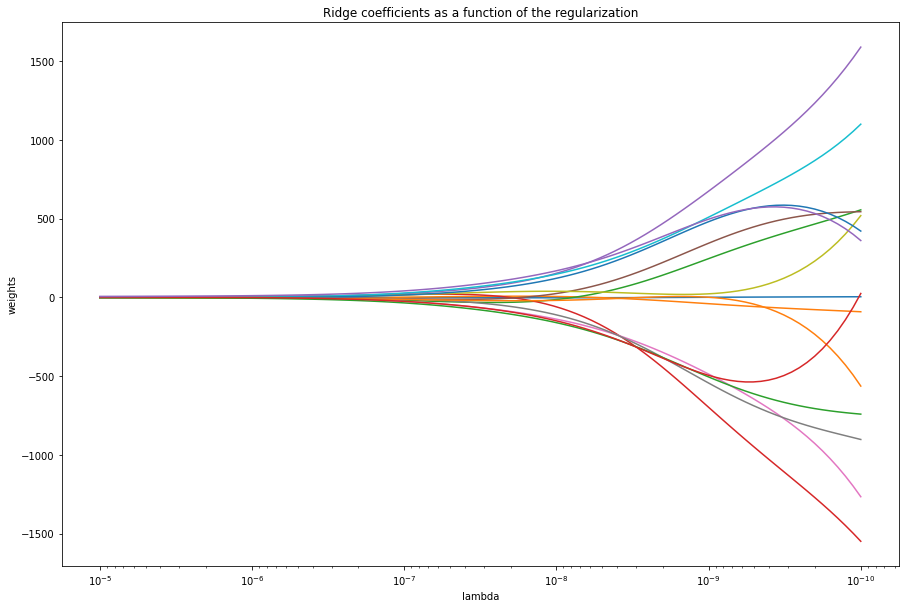

In [4]:
# Code modified from (https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# #############################################################################
# Compute paths

n_alphas = 100
alphas = np.logspace(-10,-5, n_alphas)

#Featurize X
polynomial_features_temp = PolynomialFeatures(degree=15,include_bias=False)
X_train_feat = polynomial_features_temp.fit_transform(X[:,np.newaxis])

coefs = []
for a in alphas:
    # Evaluate the models using crossvalidation
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train_feat, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

plt.figure(figsize=[15,10])
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Extra stuff (KNN)

In [5]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02  # step size in the mesh

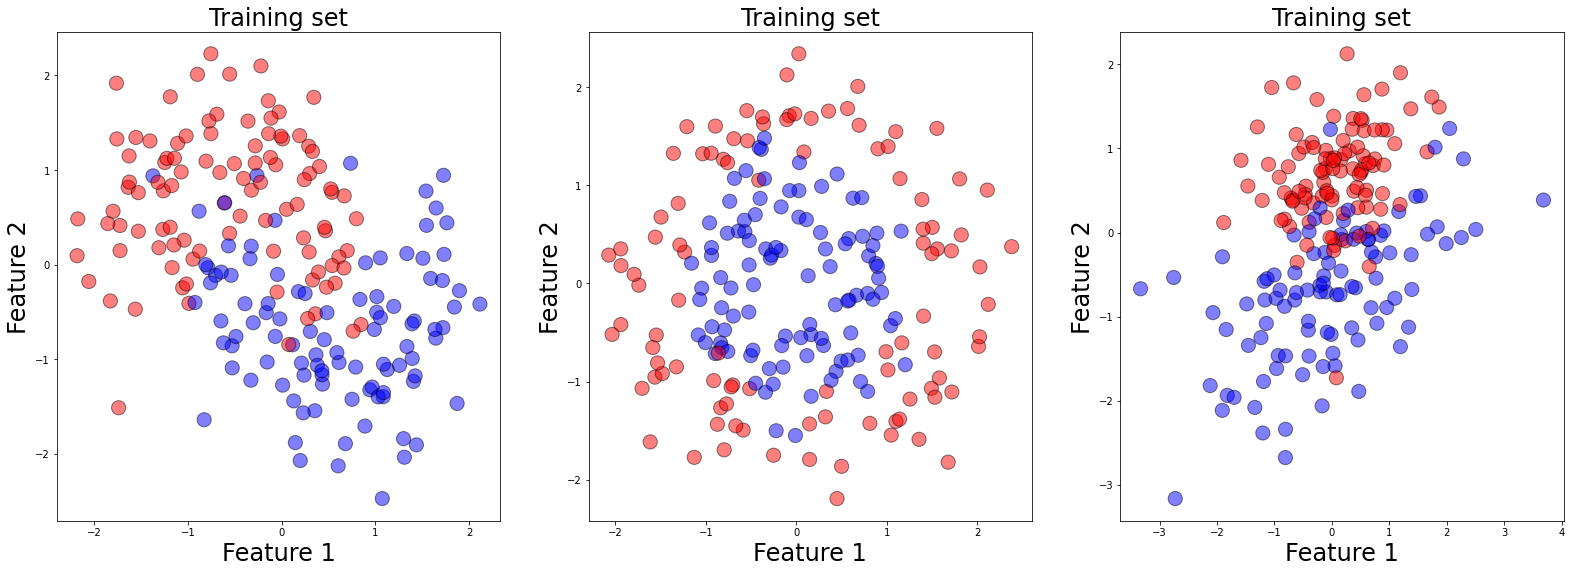

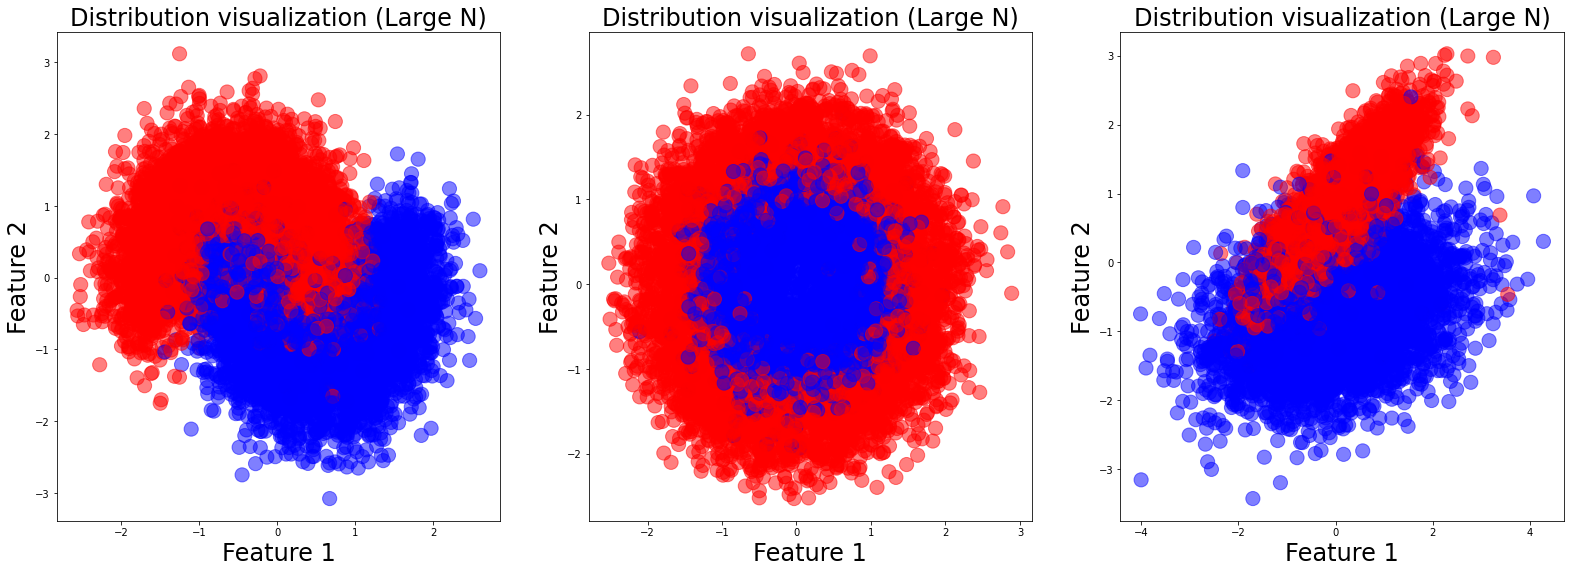

In [6]:
# Create 3 datasets
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, n_samples=200)

# rng = np.random.RandomState(2)
# X += rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0, n_samples=200),
            make_circles(noise=0.2, factor=0.5, random_state=1, n_samples=200),
            linearly_separable]

# Visualize the datasets
figure = plt.figure(figsize=(27, 9))
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    ax = plt.subplot(1, len(datasets), ds_cnt+1)
    ax.scatter(X[:, 0],
               X[:, 1],
               c=y,
               cmap=cm_bright,
               s=200,
               edgecolors='k',
               alpha=0.5
              )
    plt.title('Training set', fontsize=24)
    plt.xlabel('Feature 1', fontsize=24)
    plt.ylabel('Feature 2', fontsize=24)
    
    
    
# A better visualization of the true distributions
X_opt, y_opt = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, n_samples=10000)
linearly_separable_true = (X_opt, y_opt)
datasets_true = [make_moons(noise=0.3, random_state=0, n_samples=10000),
                make_circles(noise=0.2, factor=0.5, random_state=1, n_samples=10000),
                linearly_separable_true]

# Visualize the true datasets
figure = plt.figure(figsize=(27, 9))
for ds_cnt, ds in enumerate(datasets_true):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    ax = plt.subplot(1, len(datasets), ds_cnt+1)
    ax.scatter(X[:, 0],
               X[:, 1],
               c=y,
               cmap=cm_bright,
               s=200,
               edgecolors=None,
               alpha=0.5
              )
    plt.title('Distribution visualization (Large N)', fontsize=24)
    plt.xlabel('Feature 1', fontsize=24)
    plt.ylabel('Feature 2', fontsize=24)

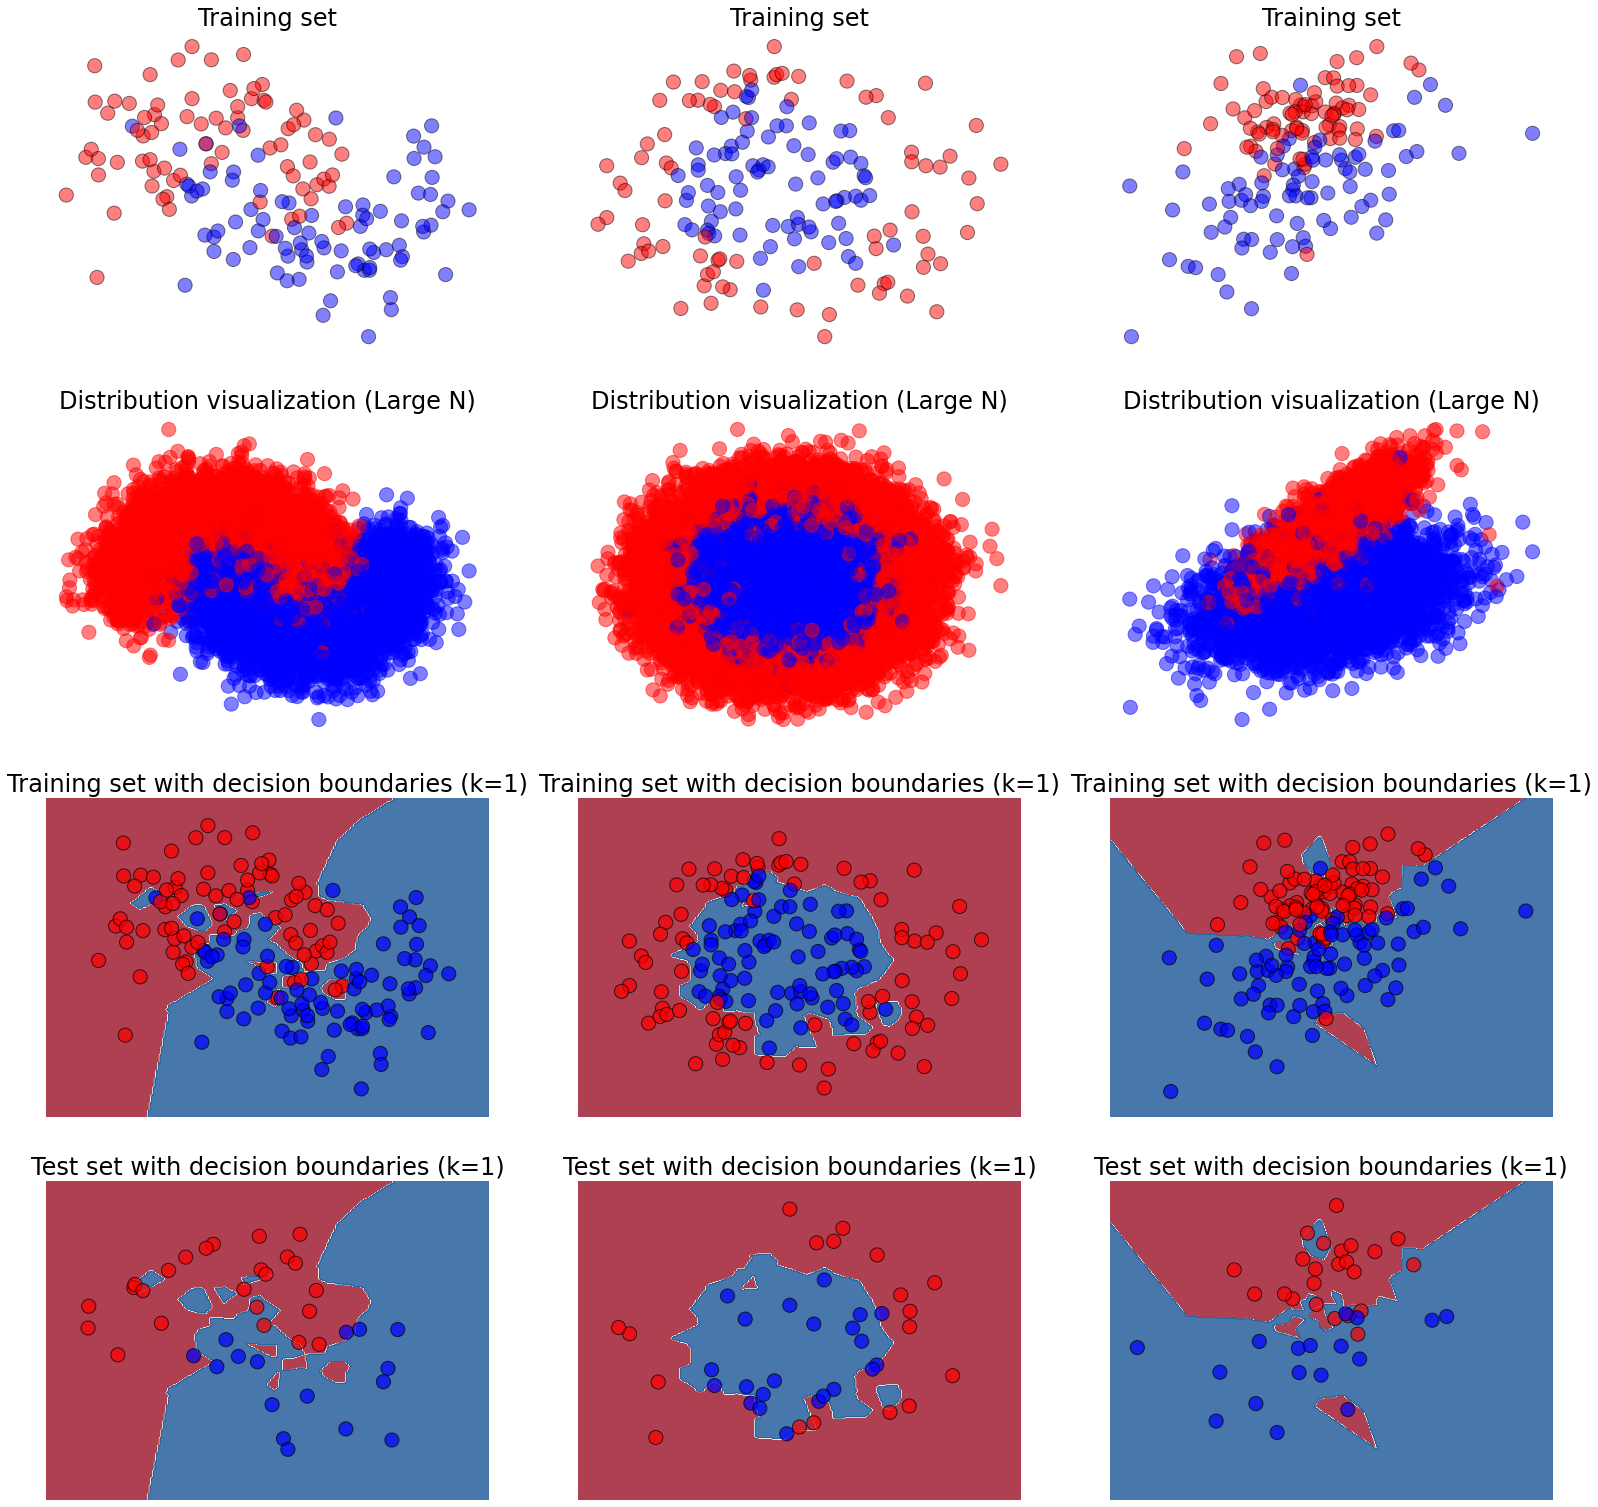

In [7]:
k_knn = 1

figure = plt.figure(figsize=(27, 27))
figCount = 1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y,
                                                        test_size=.2,
                                                        random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    #Plot training data
    ax = plt.subplot(4, len(datasets), figCount)
    ax.scatter(X_train[:, 0],
               X_train[:, 1],
               c=y_train,
               cmap=cm_bright,
               s=200,
               edgecolors='k',
               alpha=0.5)
    plt.title('Training set', fontsize=24)
    plt.axis('off')
    
    # Visualize the true datasets
    ax = plt.subplot(4, len(datasets), figCount+len(datasets))
    X, y = datasets_true[ds_cnt]
    X = StandardScaler().fit_transform(X)
    ax.scatter(X[:, 0],
               X[:, 1],
               c=y,
               cmap=cm_bright,
               s=200,
               edgecolors=None,
               alpha=0.5
              )
    plt.title('Distribution visualization (Large N)', fontsize=24)
    plt.axis('off')
    
    # Plot training data & decision boundaries
    ax = plt.subplot(4, len(datasets), figCount+2*len(datasets))
    
    # kNN classifier
    clf = KNeighborsClassifier(k_knn)
    # Build model
    clf.fit(X_train, y_train)
    
    # Classify
    score = clf.score(X_test, y_test)
    
    # Plot the decision boundary
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)

    # Plot training data
    ax = plt.scatter(X_train[:, 0],
                     X_train[:, 1],
                     c=y_train,
                     cmap=cm_bright,
                     s=200,
                     edgecolors='k',
                     alpha=0.7)
    
    plt.title('Training set with decision boundaries (k=' + str(k_knn) + ')', fontsize=24)
    plt.axis('off')
    
    # Plot test data with decision boundaries
    ax = plt.subplot(4, len(datasets), figCount+3*len(datasets))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    # Plot test data
    ax = plt.scatter(X_test[:, 0],
                     X_test[:, 1],
                     c=y_test,
                     cmap=cm_bright,
                     s=200,
                     edgecolors='k',
                     alpha=0.7)
    
    plt.title('Test set with decision boundaries (k=' + str(k_knn) + ')', fontsize=24)
    plt.axis('off')
    
    figCount +=1 